<a href="https://colab.research.google.com/github/kprabhakarans/ExKMC_OccupancyEstimation/blob/main/Occupancy_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis and Detection of Room occupancy**

**Install Pycaret**

In [1]:
!pip install pycaret==2.3.6


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Import Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The “Occupancy Data Set” used for Principle Component Analysis (PCA) and classification models is obtained from UCI Machine learning repository. The data set provided information about attributes affected the occupancy status which can ultimately provide information on occupancy status.

There are 6 attributes after processing the date feature in the original dataset to Time of day feature with 2665 entries and one column for classification. 
**0 represents None Present and 1 represents Occupants present.**


All attributes are numerical and they are listed bellow:


1. Time of day
2. Temperature
3. Light
4. Humidity
5. Carbon di Oxidie Measurement = CO2
6. Humidity Ratio
7. Occupancy (Label)




The original dataset can be found on below link:
https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+





In [4]:
import io
%matplotlib inline
df = pd.read_csv('https://raw.githubusercontent.com/kprabhakarans/PCA_Occupancy/main/Occupancy.csv')
df.head(25)


Time_of_day  Temperature  Humidity       Light         CO2  HumidityRatio  \
0             2      23.7000   26.2720  585.200000  749.200000       0.004764   
1             2      23.7180   26.2900  578.400000  760.400000       0.004773   
2             2      23.7300   26.2300  572.666667  769.666667       0.004765   
3             2      23.7225   26.1250  493.750000  774.750000       0.004744   
4             2      23.7540   26.2000  488.600000  779.000000       0.004767   
5             2      23.7600   26.2600  568.666667  790.000000       0.004779   
6             2      23.7300   26.2900  536.333333  798.000000       0.004776   
7             2      23.7540   26.2900  509.000000  797.000000       0.004783   
8             2      23.7540   26.3500  476.000000  803.200000       0.004794   
9             2      23.7360   26.3900  510.000000  809.000000       0.004796   
10            2      23.7450   26.4450  481.500000  815.250000       0.004809   
11            2      23.7000   26.5600  481.800000  824.000000       0.004817   
12            2      23.7000   26.6000  475.250000  832.000000       0.004824   
13            2      23.7000   26.7000  469.000000  845.333333       0.004842   
14            2      23.7000   26.7740  464.000000  852.400000       0.004856   
15            2      23.7000   26.8900  464.000000  861.000000       0.004877   
16            2      23.7000   26.9725  455.000000  880.000000       0.004892   
17            2      23.6000   26.8900  454.000000  891.000000       0.004848   
18            2      23.6400   26.9760  458.000000  897.600000       0.004875   
19            2      23.6500   27.0500  464.000000  900.500000       0.004891   
20            2      23.6400   27.1000  473.000000  908.800000       0.004898   
21            2      23.6000   27.1600  464.000000  918.000000       0.004897   
22            2      23.6000   27.2360  498.400000  925.200000       0.004910   
23            2      23.6000   27.2900  530.200000  929.400000       0.004920   
24            2      23.6000   27.3300  533.600000  936.400000       0.004928   

    Occupancy  
0           1  
1           1  
2           1  
3           1  
4           1  
5           1  
6           1  
7           1  
8           1  
9           1  
10          1  
11          1  
12          1  
13          1  
14          1  
15          1  
16          1  
17          1  
18          1  
19          1  
20          1  
21          1  
22          1  
23          1  
24          1

In [5]:
len(df.index)

2665

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time_of_day    2665 non-null   int64  
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 145.9 KB


In [7]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  82


In [8]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

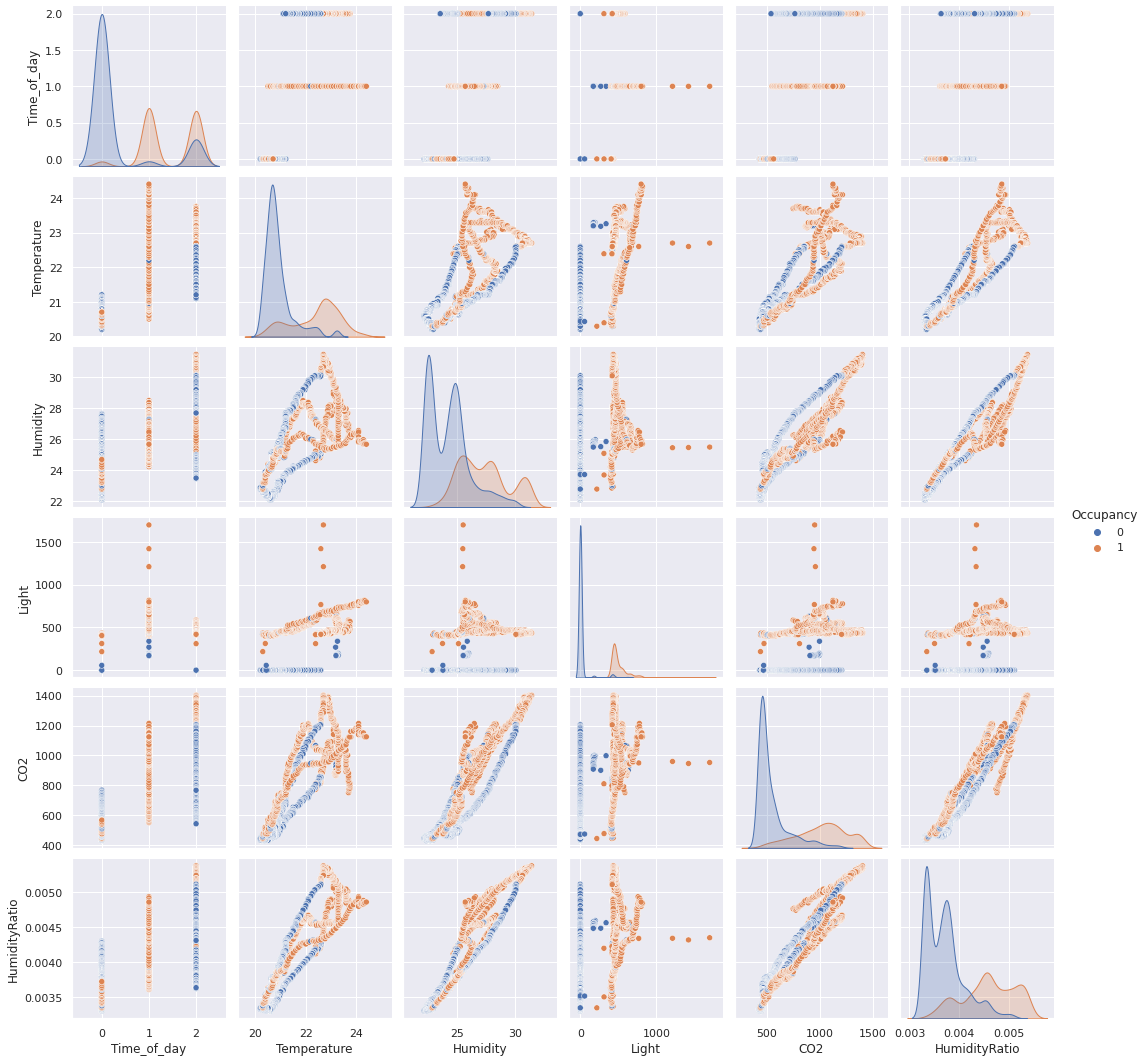

In [9]:
sns.pairplot(df, hue='Occupancy')
plt.show()

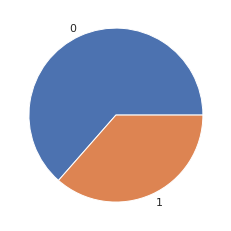

In [10]:
y =df['Occupancy']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [11]:
X = df.drop(columns=['Occupancy'])
X.head(10)

Time_of_day  Temperature  Humidity       Light         CO2  HumidityRatio
0            2      23.7000    26.272  585.200000  749.200000       0.004764
1            2      23.7180    26.290  578.400000  760.400000       0.004773
2            2      23.7300    26.230  572.666667  769.666667       0.004765
3            2      23.7225    26.125  493.750000  774.750000       0.004744
4            2      23.7540    26.200  488.600000  779.000000       0.004767
5            2      23.7600    26.260  568.666667  790.000000       0.004779
6            2      23.7300    26.290  536.333333  798.000000       0.004776
7            2      23.7540    26.290  509.000000  797.000000       0.004783
8            2      23.7540    26.350  476.000000  803.200000       0.004794
9            2      23.7360    26.390  510.000000  809.000000       0.004796

In [12]:
X.describe().transpose()

count        mean         std         min         25%  \
Time_of_day    2665.0    0.723077    0.852842    0.000000    0.000000   
Temperature    2665.0   21.433876    1.028024   20.200000   20.650000   
Humidity       2665.0   25.353937    2.436842   22.100000   23.260000   
Light          2665.0  193.227556  250.210906    0.000000    0.000000   
CO2            2665.0  717.906470  292.681718  427.500000  466.000000   
HumidityRatio  2665.0    0.004027    0.000611    0.003303    0.003529   

                      50%         75%          max  
Time_of_day      0.000000    2.000000     2.000000  
Temperature     20.890000   22.356667    24.408333  
Humidity        25.000000   26.856667    31.472500  
Light            0.000000  442.500000  1697.250000  
CO2            580.500000  956.333333  1402.250000  
HumidityRatio    0.003815    0.004532     0.005378

**Standardize the Data**

In [13]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Time_of_day  Temperature  Humidity     Light       CO2  HumidityRatio
0     1.497538     2.204762  0.376814  1.566862  0.106940       1.207540
1     1.497538     2.222275  0.384202  1.539680  0.145214       1.221461
2     1.497538     2.233950  0.359575  1.516762  0.176881       1.209162
3     1.497538     2.226653  0.316478  1.201302  0.194253       1.174139
4     1.497538     2.257300  0.347262  1.180715  0.208776       1.211522
5     1.497538     2.263138  0.371888  1.500772  0.246367       1.232389
6     1.497538     2.233950  0.384202  1.371524  0.273705       1.227153
7     1.497538     2.257300  0.384202  1.262262  0.270288       1.238551
8     1.497538     2.257300  0.408828  1.130348  0.291475       1.256571
9     1.497538     2.239788  0.425246  1.266259  0.311296       1.260002

In [14]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Time_of_day    2665.0 -2.239609e-16  1.000188 -0.848003 -0.848003 -0.848003   
Temperature    2665.0  3.114124e-15  1.000188 -1.200466 -0.762651 -0.529149   
Humidity       2665.0  9.385030e-16  1.000188 -1.335559 -0.859444 -0.145271   
Light          2665.0  1.386425e-16  1.000188 -0.772404 -0.772404 -0.772404   
CO2            2665.0 -3.199442e-16  1.000188 -0.992412 -0.860846 -0.469562   
HumidityRatio  2665.0  1.493073e-16  1.000188 -1.185497 -0.815008 -0.347182   

                    75%       max  
Time_of_day    1.497538  1.497538  
Temperature    0.897803  2.893916  
Humidity       0.616787  2.511328  
Light          0.996436  6.012147  
CO2            0.814781  2.338622  
HumidityRatio  0.826469  2.212680

**Observations and variables**

In [15]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

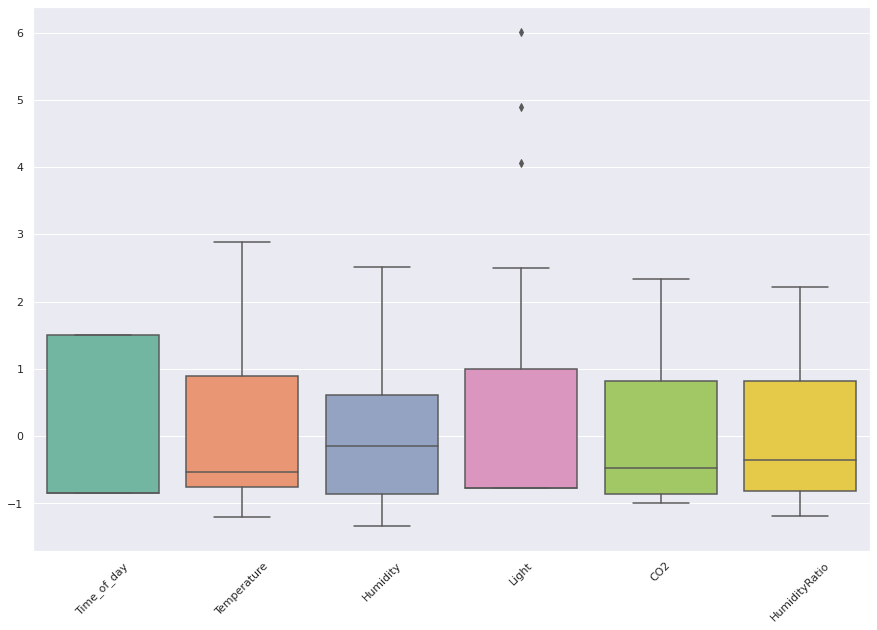

In [16]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

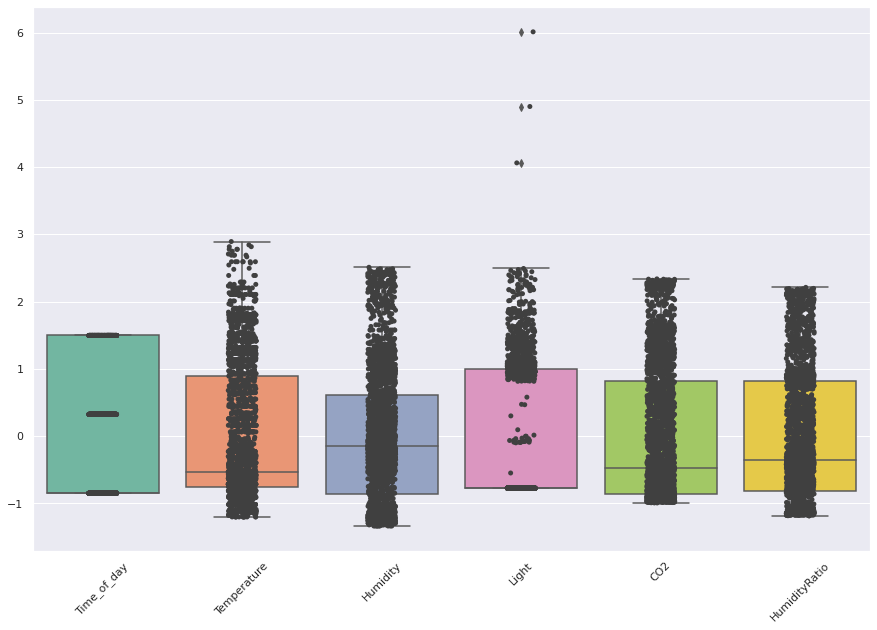

In [17]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

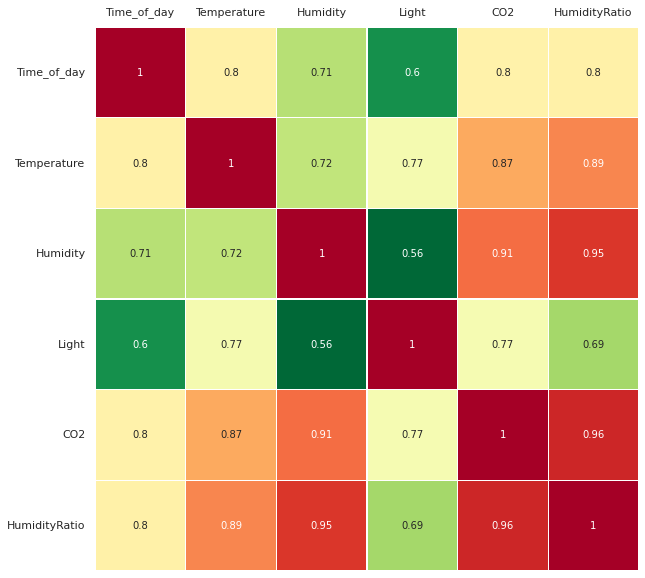

In [18]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

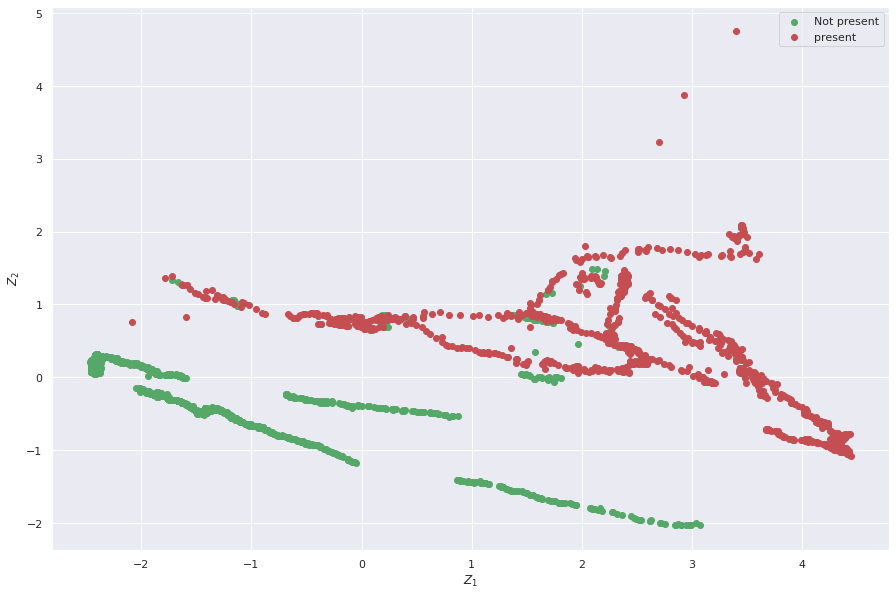

In [19]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_Notpresent= np.where(y == 0)
idx_present = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Notpresent,0], Z[idx_Notpresent,1], c='g', label='Not present')
plt.scatter(Z[idx_present,0], Z[idx_present,1], c='r', label='present')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

In [20]:
var = ['Time of Day','Temperature','Humidity','Light','CO2','Humidity Ratio']

array([[ 0.38785557, -0.09559396,  0.81116149, -0.42176375,  0.06711667,
         0.00758803],
       [ 0.41652299,  0.23221546,  0.22686499,  0.77227821,  0.07394051,
        -0.34530569],
       [ 0.4023443 , -0.51542457, -0.38575661, -0.20429445,  0.37476028,
        -0.49139285],
       [ 0.35874701,  0.78286927, -0.28490921, -0.36081009,  0.21662829,
         0.01145834],
       [ 0.4390713 , -0.07281937, -0.19372782, -0.09121852, -0.86874545,
        -0.0366577 ],
       [ 0.43899054, -0.23040907, -0.15178084,  0.21321524,  0.21894388,
         0.79860152]])

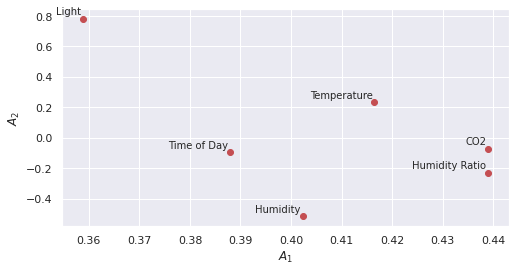

In [21]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(var, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


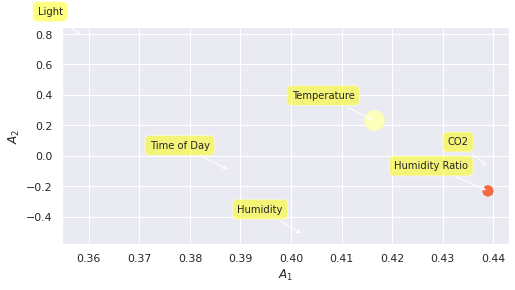

In [22]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(var,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([4.96163873e+00, 5.09439807e-01, 3.35836048e-01, 1.58496616e-01,
       3.60762619e-02, 7.64794326e-04])

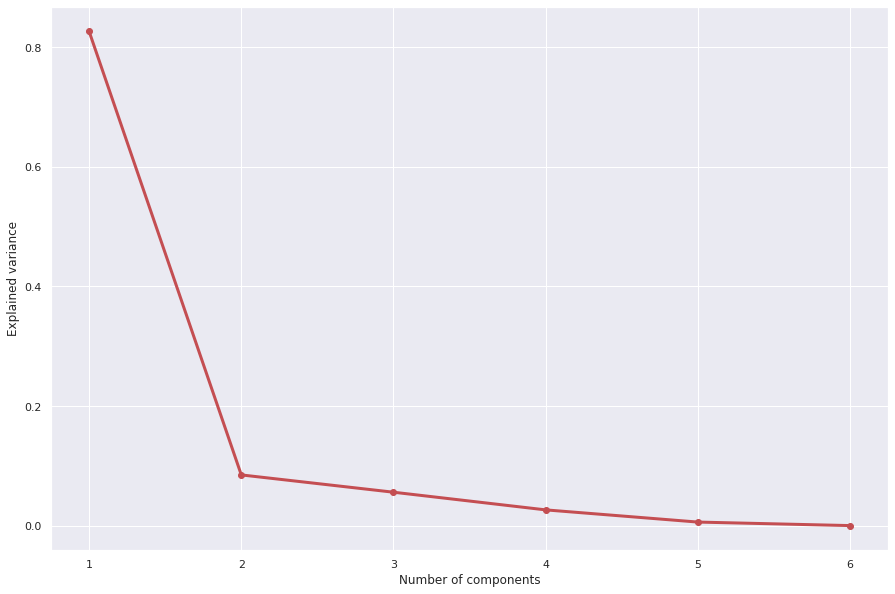

In [23]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

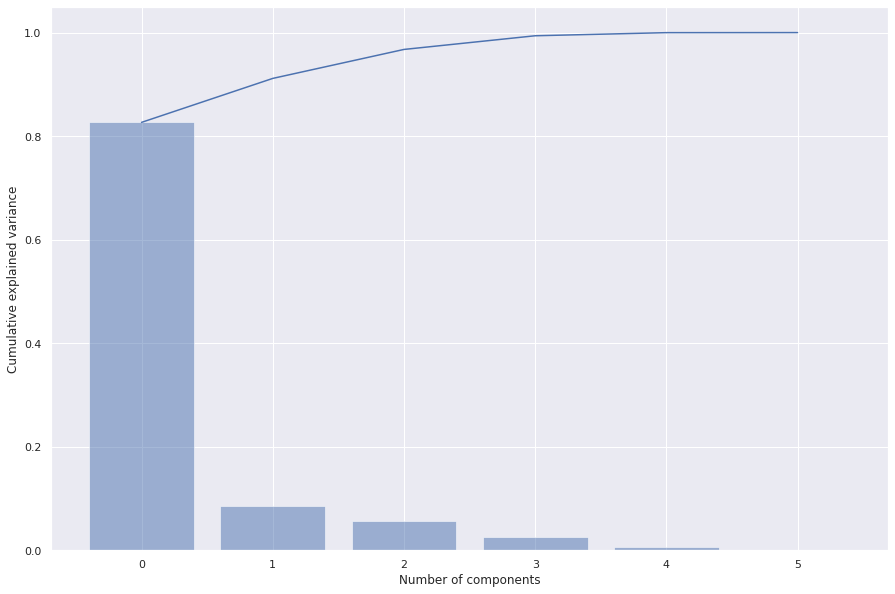

In [24]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([1.11523802, 1.08822213, 1.08621221, ..., 2.09346518, 2.08472499,
       2.04868941])

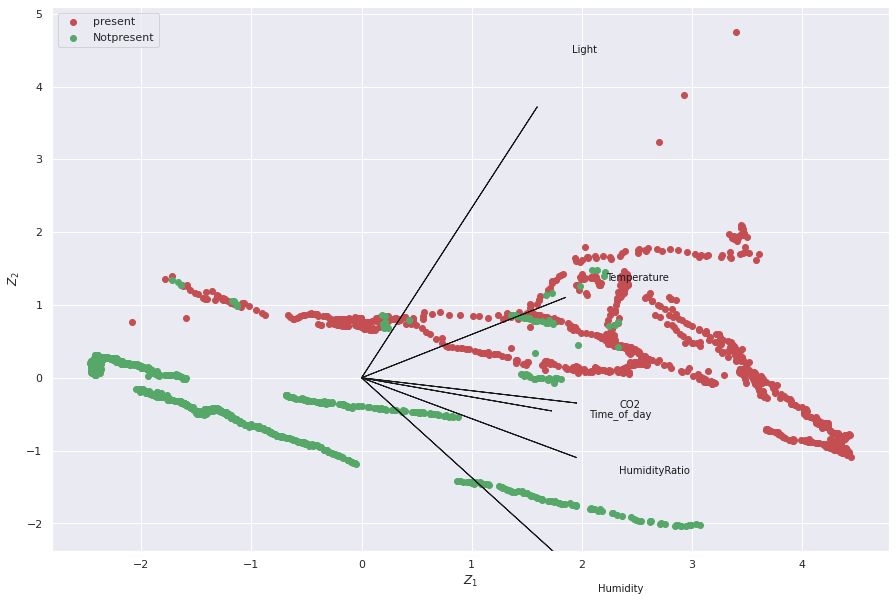

In [25]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_present,0], Z[idx_present,1], c='r', label='present')
plt.scatter(Z[idx_Notpresent,0], Z[idx_Notpresent,1], c='g', label='Notpresent')

plt.legend(loc='upper left')
Z1
Z2

# **Using PCA Library**

In [26]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=f7d202b9668a5fd218adeaa69dab4beb99f0a47db0a8866faafb4efa8d4f285d
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=f7af73ac97dc341ac4097c5195f3cac7b39cbad34991770d251d3c1308d0a8fb
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


In [27]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [28]:
out['PC']

PC1       PC2       PC3
0     2.789932  1.115238  0.919158
1     2.813363  1.088222  0.918498
2     2.808601  1.086212  0.932908
3     2.667304  0.866572  1.039705
4     2.707857  0.832034  1.032161
...        ...       ...       ...
2660  3.447643  2.054587 -0.346749
2661  3.454108  2.059892 -0.336337
2662  3.448472  2.093465 -0.334888
2663  3.454951  2.084725 -0.324532
2664  3.461227  2.048689 -0.296700

[2665 rows x 3 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [2665] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [2665] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8dccb43eb0>)

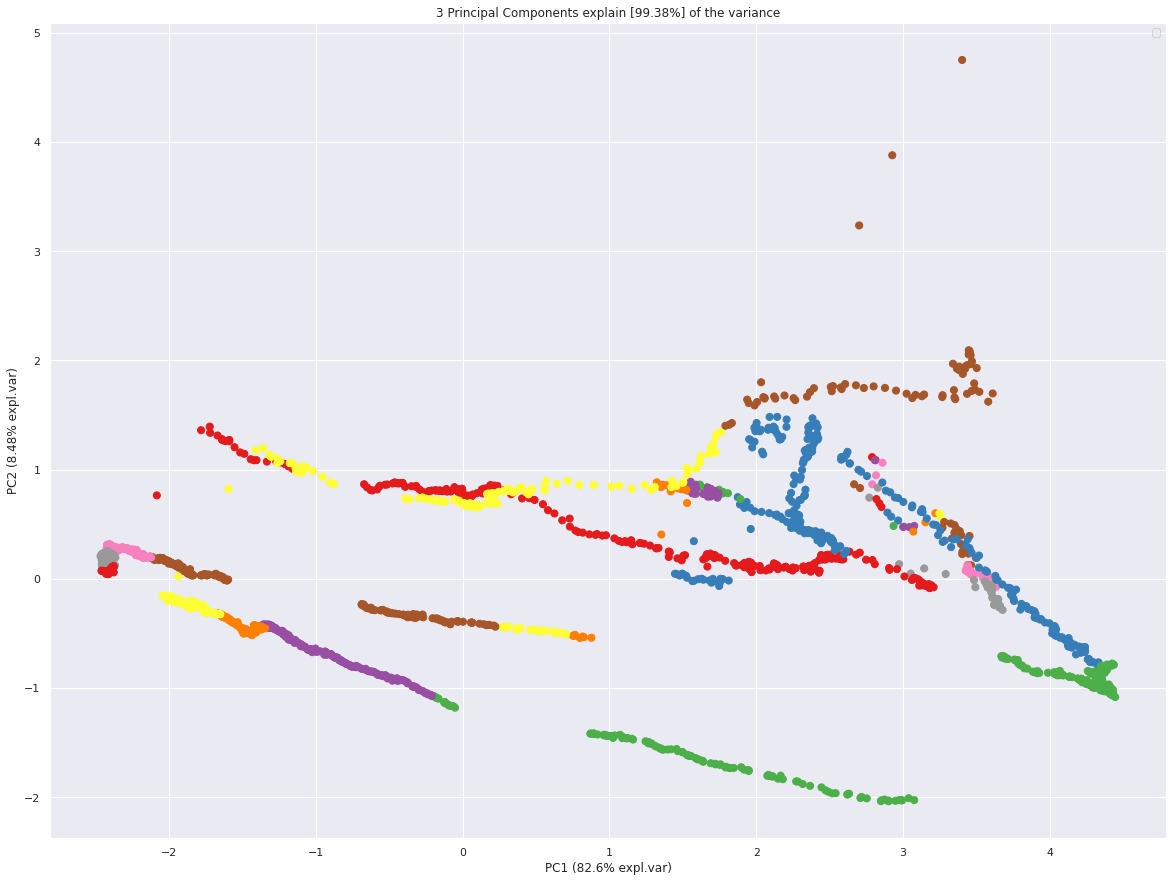

In [29]:
model.scatter(label=None, legend=True)

**Eigenvectors**

In [30]:
A = out['loadings'].T
A

PC1       PC2       PC3
Time_of_day    0.387856 -0.095594  0.811161
Temperature    0.416523  0.232215  0.226865
Humidity       0.402344 -0.515425 -0.385757
Light          0.358747  0.782869 -0.284909
CO2            0.439071 -0.072819 -0.193728
HumidityRatio  0.438991 -0.230409 -0.151781

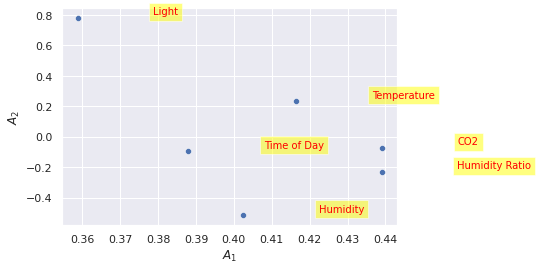

In [31]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=var[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))
 

**Scree Plot**

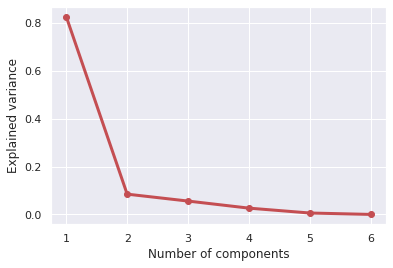

In [32]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

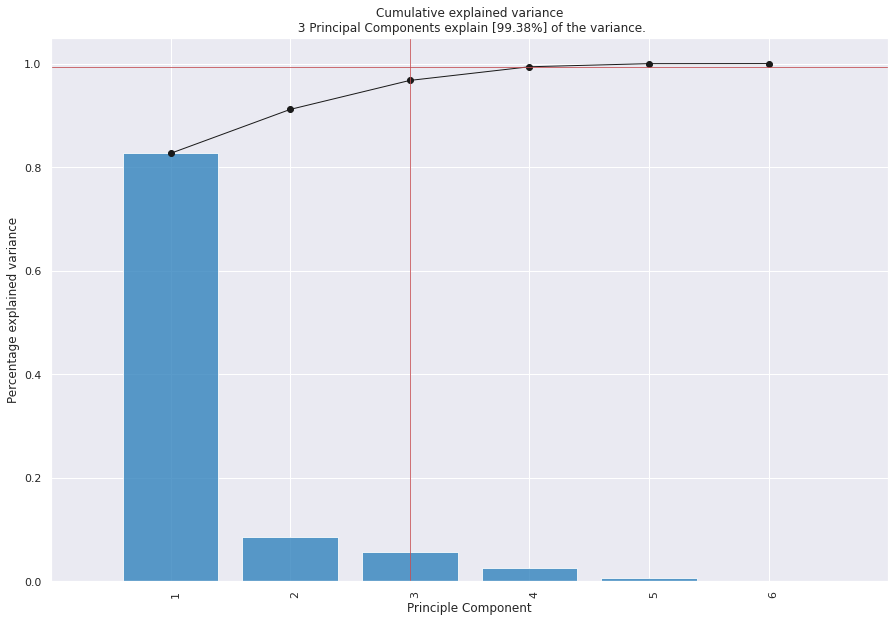

<Figure size 432x288 with 0 Axes>

In [33]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [2665] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [2665] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


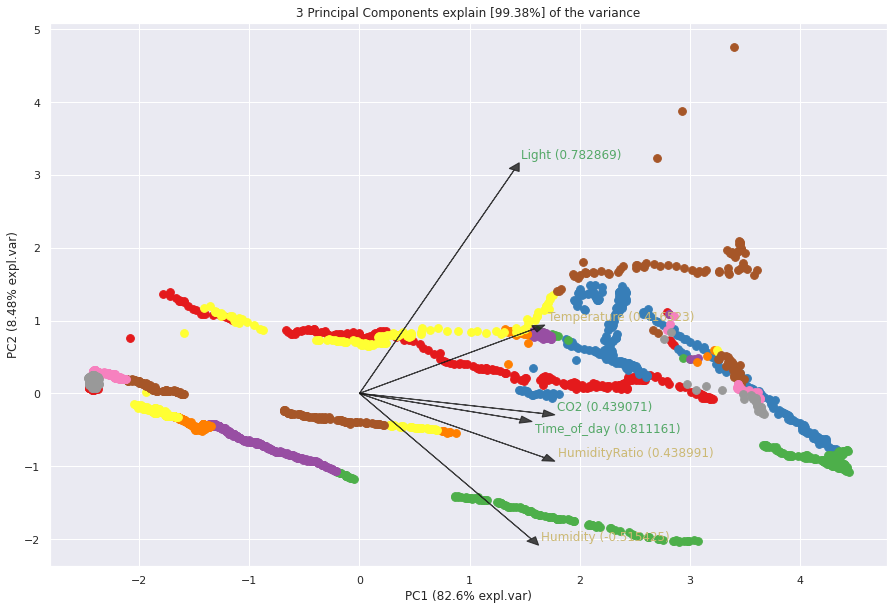

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8dccd6b640>)

In [34]:
model.biplot(label=False, legend=False, color_arrow='k')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [2665] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [2665] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


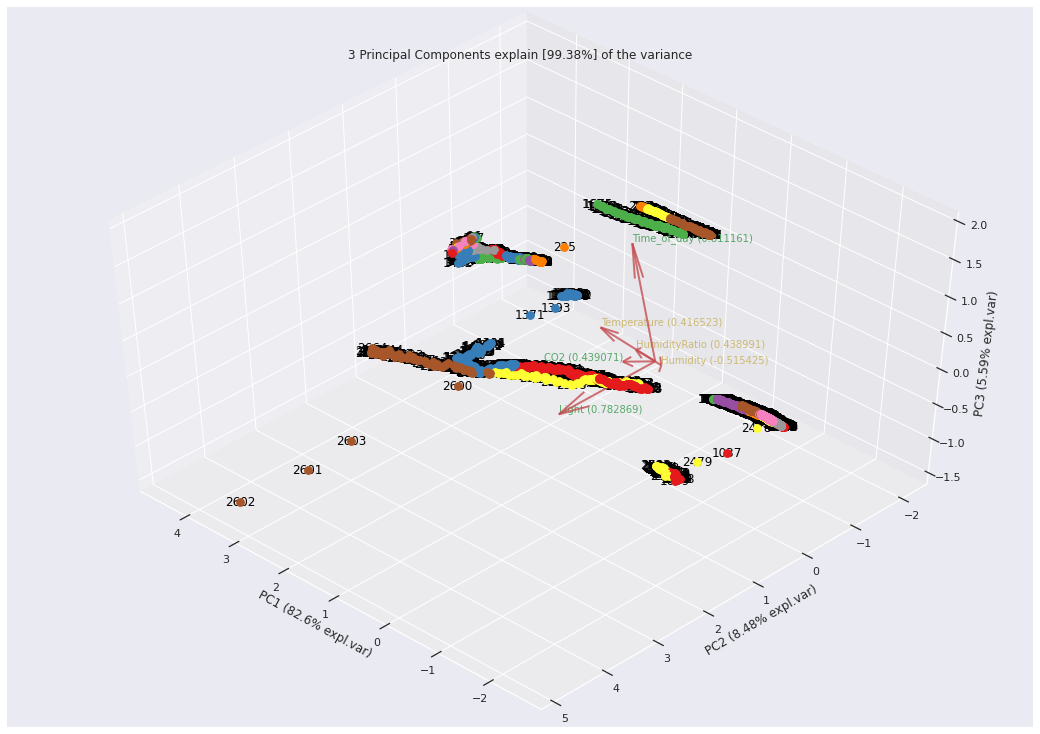

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f8dbe4c7340>)

In [35]:
model.biplot3d(legend=False)

# Classification using Pycaret
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. 
Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

 However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [36]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

In [37]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [38]:
dr = df.drop(columns=['Occupancy'])
data = dr.sample(frac=0.9, random_state=786)
data_unseen = dr.drop(data.index)


data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2398, 6)
Unseen Data For Predictions: (267, 6)


In [39]:
from pycaret.classification import *
clf = setup(data=df, target='Occupancy', train_size=0.6, session_id=123)

Description             Value
0                               session_id               123
1                                   Target         Occupancy
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data         (2665, 7)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (1599, 8)
12                    Transformed Test Set         (1066, 8)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              ed7a
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Occupancy',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

**Comparing All Models**

In [40]:
#show the best model and their statistics
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
ada                  Ada Boost Classifier    0.9825  0.9954  0.9884  0.9663   
et                 Extra Trees Classifier    0.9825  0.9985  0.9867  0.9681   
lightgbm  Light Gradient Boosting Machine    0.9819  0.9987  0.9834  0.9694   
knn                K Neighbors Classifier    0.9806  0.9965  0.9867  0.9633   
rf               Random Forest Classifier    0.9806  0.9989  0.9851  0.9650   
gbc          Gradient Boosting Classifier    0.9806  0.9980  0.9868  0.9633   
dt               Decision Tree Classifier    0.9794  0.9793  0.9785  0.9680   
ridge                    Ridge Classifier    0.9794  0.0000  1.0000  0.9487   
lda          Linear Discriminant Analysis    0.9794  0.9929  1.0000  0.9487   
lr                    Logistic Regression    0.9787  0.9949  0.9983  0.9485   
qda       Quadratic Discriminant Analysis    0.9744  0.9905  0.9884  0.9471   
nb                            Naive Bayes    0.9500  0.9865  0.9635  0.9108   
svm                   SVM - Linear Kernel    0.9375  0.0000  0.9066  0.9299   
dummy                    Dummy Classifier    0.6235  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
ada       0.9771  0.9629  0.9633     0.147  
et        0.9771  0.9630  0.9633     0.157  
lightgbm  0.9762  0.9615  0.9618     0.136  
knn       0.9747  0.9590  0.9594     0.021  
rf        0.9747  0.9590  0.9595     0.195  
gbc       0.9746  0.9590  0.9595     0.154  
dt        0.9728  0.9562  0.9568     0.012  
ridge     0.9735  0.9566  0.9578     0.011  
lda       0.9735  0.9566  0.9578     0.013  
lr        0.9727  0.9553  0.9563     0.294  
qda       0.9670  0.9461  0.9471     0.012  
nb        0.9359  0.8950  0.8965     0.011  
svm       0.9029  0.8600  0.8718     0.013  
dummy     0.0000  0.0000  0.0000     0.010

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)
INFO:logs:compare_models() succesfully completed......................................


In [41]:
best_model

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)

 Create a Model

**ET Classifier**

In [42]:
et = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9875  0.9987  0.9836  0.9836  0.9836  0.9735  0.9735
1       0.9812  0.9997  0.9672  0.9833  0.9752  0.9601  0.9602
2       0.9875  1.0000  1.0000  0.9677  0.9836  0.9735  0.9739
3       0.9938  0.9997  0.9833  1.0000  0.9916  0.9866  0.9867
4       0.9625  0.9922  0.9833  0.9219  0.9516  0.9211  0.9223
5       0.9750  0.9988  0.9833  0.9516  0.9672  0.9470  0.9474
6       0.9938  0.9986  1.0000  0.9836  0.9917  0.9867  0.9868
7       0.9625  0.9980  0.9833  0.9219  0.9516  0.9211  0.9223
8       0.9938  1.0000  1.0000  0.9836  0.9917  0.9867  0.9868
9       0.9874  0.9992  0.9833  0.9833  0.9833  0.9732  0.9732
Mean    0.9825  0.9985  0.9867  0.9681  0.9771  0.9630  0.9633
SD      0.0115  0.0022  0.0099  0.0260  0.0147  0.0241  0.0236

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune the model**

In [43]:
tuned_et=tune_model(et)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9812  0.9975  1.0000  0.9531  0.9760  0.9606  0.9614
1       0.9875  0.9997  1.0000  0.9683  0.9839  0.9737  0.9740
2       0.9875  0.9978  1.0000  0.9677  0.9836  0.9735  0.9739
3       0.9750  0.9983  1.0000  0.9375  0.9677  0.9474  0.9487
4       0.9625  0.9955  1.0000  0.9091  0.9524  0.9216  0.9244
5       0.9812  0.9935  1.0000  0.9524  0.9756  0.9604  0.9612
6       0.9875  0.9963  1.0000  0.9677  0.9836  0.9735  0.9739
7       0.9500  0.9915  0.9833  0.8939  0.9365  0.8954  0.8982
8       0.9875  0.9992  1.0000  0.9677  0.9836  0.9735  0.9739
9       0.9874  1.0000  1.0000  0.9677  0.9836  0.9734  0.9738
Mean    0.9787  0.9969  0.9983  0.9485  0.9727  0.9553  0.9563
SD      0.0122  0.0026  0.0050  0.0256  0.0154  0.0255  0.0246

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [44]:
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Evaluate ET**


In [45]:
evaluate_model(tuned_et)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create model with Random forest classifier**

In [46]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9812  0.9993  0.9672  0.9833  0.9752  0.9601  0.9602
1       0.9812  0.9992  0.9672  0.9833  0.9752  0.9601  0.9602
2       0.9875  0.9999  1.0000  0.9677  0.9836  0.9735  0.9739
3       0.9812  0.9995  0.9833  0.9672  0.9752  0.9601  0.9602
4       0.9688  0.9974  1.0000  0.9231  0.9600  0.9344  0.9364
5       0.9812  0.9988  0.9833  0.9672  0.9752  0.9601  0.9602
6       0.9938  0.9987  1.0000  0.9836  0.9917  0.9867  0.9868
7       0.9562  0.9973  0.9833  0.9077  0.9440  0.9082  0.9102
8       0.9938  0.9997  1.0000  0.9836  0.9917  0.9867  0.9868
9       0.9811  0.9990  0.9667  0.9831  0.9748  0.9597  0.9598
Mean    0.9806  0.9989  0.9851  0.9650  0.9747  0.9590  0.9595
SD      0.0106  0.0008  0.0137  0.0260  0.0135  0.0222  0.0216

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune model**

In [47]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9812  0.9908  0.9672  0.9833  0.9752  0.9601  0.9602
1       0.9875  0.9998  0.9836  0.9836  0.9836  0.9735  0.9735
2       0.9875  0.9948  1.0000  0.9677  0.9836  0.9735  0.9739
3       0.9875  0.9995  1.0000  0.9677  0.9836  0.9735  0.9739
4       0.9688  0.9822  1.0000  0.9231  0.9600  0.9344  0.9364
5       0.9812  0.9871  1.0000  0.9524  0.9756  0.9604  0.9612
6       0.9812  0.9853  0.9833  0.9672  0.9752  0.9601  0.9602
7       0.9562  0.9859  0.9833  0.9077  0.9440  0.9082  0.9102
8       0.9938  0.9999  1.0000  0.9836  0.9917  0.9867  0.9868
9       0.9874  0.9991  1.0000  0.9677  0.9836  0.9734  0.9738
Mean    0.9812  0.9924  0.9917  0.9604  0.9756  0.9604  0.9610
SD      0.0105  0.0066  0.0110  0.0246  0.0133  0.0219  0.0212

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [48]:
tuned_rf

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

**Evaluate model**

In [49]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create model with Light Gradient Boosting Machine**

In [50]:
lightgbm=create_model('lightgbm')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9875  0.9992  0.9672  1.0000  0.9833  0.9733  0.9737
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9938  0.9993  1.0000  0.9836  0.9917  0.9867  0.9868
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9562  0.9963  0.9667  0.9206  0.9431  0.9076  0.9083
5       0.9750  0.9982  0.9833  0.9516  0.9672  0.9470  0.9474
6       0.9938  0.9980  1.0000  0.9836  0.9917  0.9867  0.9868
7       0.9562  0.9975  0.9667  0.9206  0.9431  0.9076  0.9083
8       0.9875  1.0000  1.0000  0.9677  0.9836  0.9735  0.9739
9       0.9686  0.9988  0.9500  0.9661  0.9580  0.9329  0.9329
Mean    0.9819  0.9987  0.9834  0.9694  0.9762  0.9615  0.9618
SD      0.0159  0.0012  0.0182  0.0288  0.0208  0.0337  0.0335

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


**Tune lightgbm Model**

In [51]:
tuned_lightgbm=tune_model(lightgbm)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9812  0.9992  0.9672  0.9833  0.9752  0.9601  0.9602
1       0.9938  0.9993  1.0000  0.9839  0.9919  0.9868  0.9869
2       0.9938  0.9997  1.0000  0.9836  0.9917  0.9867  0.9868
3       0.9938  0.9997  0.9833  1.0000  0.9916  0.9866  0.9867
4       0.9688  0.9945  1.0000  0.9231  0.9600  0.9344  0.9364
5       0.9750  0.9962  0.9833  0.9516  0.9672  0.9470  0.9474
6       0.9938  0.9980  1.0000  0.9836  0.9917  0.9867  0.9868
7       0.9625  0.9980  0.9833  0.9219  0.9516  0.9211  0.9223
8       0.9938  1.0000  1.0000  0.9836  0.9917  0.9867  0.9868
9       0.9811  0.9985  0.9667  0.9831  0.9748  0.9597  0.9598
Mean    0.9837  0.9983  0.9884  0.9698  0.9787  0.9656  0.9660
SD      0.0113  0.0017  0.0129  0.0262  0.0145  0.0237  0.0232

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate lightgbm Model**

In [52]:
tuned_lightgbm

LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [53]:
evaluate_model(tuned_lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [54]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Classification + PCA**

In [55]:
clf_pca = setup(data=df, target='Occupancy', train_size=0.6, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target         Occupancy
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data         (2665, 7)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (1599, 3)
12                    Transformed Test Set         (1066, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              7af8
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Occupancy',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                ('dummy', Dummify(target='Occupancy')),
                ('fix_perfect', Remove_100(target='Occupancy')),
                ('clean_names', Clean_Colum_Names()),

# **Comparing Models**

In [56]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.9819  0.9976  0.9851  0.9681   
knn                K Neighbors Classifier    0.9812  0.9960  0.9867  0.9648   
rf               Random Forest Classifier    0.9794  0.9975  0.9867  0.9601   
lightgbm  Light Gradient Boosting Machine    0.9775  0.9970  0.9751  0.9657   
gbc          Gradient Boosting Classifier    0.9756  0.9971  0.9784  0.9581   
ada                  Ada Boost Classifier    0.9737  0.9932  0.9817  0.9506   
dt               Decision Tree Classifier    0.9731  0.9709  0.9618  0.9671   
qda       Quadratic Discriminant Analysis    0.9693  0.9892  1.0000  0.9256   
svm                   SVM - Linear Kernel    0.9675  0.0000  0.9917  0.9278   
lr                    Logistic Regression    0.9600  0.9892  0.9618  0.9350   
ridge                    Ridge Classifier    0.9600  0.0000  0.9618  0.9350   
lda          Linear Discriminant Analysis    0.9600  0.9899  0.9618  0.9350   
nb                            Naive Bayes    0.9249  0.9832  0.9635  0.8583   
dummy                    Dummy Classifier    0.6235  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
et        0.9763  0.9616  0.9621     0.165  
knn       0.9754  0.9603  0.9607     0.021  
rf        0.9730  0.9563  0.9568     0.212  
lightgbm  0.9703  0.9522  0.9524     0.059  
gbc       0.9680  0.9483  0.9487     0.142  
ada       0.9658  0.9445  0.9450     0.103  
dt        0.9642  0.9427  0.9430     0.011  
qda       0.9611  0.9359  0.9381     0.012  
svm       0.9585  0.9318  0.9335     0.011  
lr        0.9479  0.9154  0.9161     0.015  
ridge     0.9479  0.9154  0.9161     0.012  
lda       0.9479  0.9154  0.9161     0.011  
nb        0.9071  0.8447  0.8496     0.011  
dummy     0.0000  0.0000  0.0000     0.011

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


# **Best model with PCA**

In [57]:
best_model_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

# **Tune Best Model**

In [58]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9812  0.9978     1.0  0.9531  0.9760  0.9606  0.9614
1       0.9812  0.9988     1.0  0.9531  0.9760  0.9606  0.9614
2       0.9812  0.9953     1.0  0.9524  0.9756  0.9604  0.9612
3       0.9688  0.9978     1.0  0.9231  0.9600  0.9344  0.9364
4       0.9500  0.9938     1.0  0.8824  0.9375  0.8961  0.9010
5       0.9688  0.9935     1.0  0.9231  0.9600  0.9344  0.9364
6       0.9812  0.9990     1.0  0.9524  0.9756  0.9604  0.9612
7       0.9562  0.9927     1.0  0.8955  0.9449  0.9088  0.9126
8       0.9875  0.9993     1.0  0.9677  0.9836  0.9735  0.9739
9       0.9560  0.9998     1.0  0.8955  0.9449  0.9084  0.9123
Mean    0.9712  0.9968     1.0  0.9298  0.9634  0.9398  0.9418
SD      0.0126  0.0026     0.0  0.0287  0.0155  0.0260  0.0245

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


# **Evaluate Best Model**

In [59]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [60]:
et_pca = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9812  0.9992  0.9672  0.9833  0.9752  0.9601  0.9602
1       0.9812  0.9993  0.9672  0.9833  0.9752  0.9601  0.9602
2       0.9875  0.9933  1.0000  0.9677  0.9836  0.9735  0.9739
3       0.9875  0.9995  0.9833  0.9833  0.9833  0.9733  0.9733
4       0.9688  0.9924  0.9833  0.9365  0.9593  0.9340  0.9347
5       0.9750  0.9982  0.9667  0.9667  0.9667  0.9467  0.9467
6       0.9875  0.9964  1.0000  0.9677  0.9836  0.9735  0.9739
7       0.9625  0.9980  1.0000  0.9091  0.9524  0.9216  0.9244
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.9874  0.9995  0.9833  0.9833  0.9833  0.9732  0.9732
Mean    0.9819  0.9976  0.9851  0.9681  0.9763  0.9616  0.9621
SD      0.0102  0.0026  0.0137  0.0254  0.0131  0.0215  0.0209

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


# **Tune Model**

In [61]:
tuned_et_pca = tune_model(et_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9812  0.9978     1.0  0.9531  0.9760  0.9606  0.9614
1       0.9812  0.9988     1.0  0.9531  0.9760  0.9606  0.9614
2       0.9812  0.9953     1.0  0.9524  0.9756  0.9604  0.9612
3       0.9688  0.9978     1.0  0.9231  0.9600  0.9344  0.9364
4       0.9500  0.9938     1.0  0.8824  0.9375  0.8961  0.9010
5       0.9688  0.9935     1.0  0.9231  0.9600  0.9344  0.9364
6       0.9812  0.9990     1.0  0.9524  0.9756  0.9604  0.9612
7       0.9562  0.9927     1.0  0.8955  0.9449  0.9088  0.9126
8       0.9875  0.9993     1.0  0.9677  0.9836  0.9735  0.9739
9       0.9560  0.9998     1.0  0.8955  0.9449  0.9084  0.9123
Mean    0.9712  0.9968     1.0  0.9298  0.9634  0.9398  0.9418
SD      0.0126  0.0026     0.0  0.0287  0.0155  0.0260  0.0245

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


# **Evaluate Model**

In [62]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [63]:
evaluate_model(tuned_et_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create K-NN**

In [64]:
knn_pca = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9812  0.9985  0.9672  0.9833  0.9752  0.9601  0.9602
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9875  0.9946  1.0000  0.9677  0.9836  0.9735  0.9739
3       0.9750  0.9908  0.9833  0.9516  0.9672  0.9470  0.9474
4       0.9688  0.9936  1.0000  0.9231  0.9600  0.9344  0.9364
5       0.9625  0.9974  0.9500  0.9500  0.9500  0.9200  0.9200
6       0.9938  0.9942  1.0000  0.9836  0.9917  0.9867  0.9868
7       0.9625  0.9972  0.9833  0.9219  0.9516  0.9211  0.9223
8       0.9875  0.9995  0.9833  0.9833  0.9833  0.9733  0.9733
9       0.9937  0.9944  1.0000  0.9836  0.9917  0.9867  0.9867
Mean    0.9812  0.9960  0.9867  0.9648  0.9754  0.9603  0.9607
SD      0.0128  0.0028  0.0163  0.0257  0.0167  0.0271  0.0267

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


# **Tune Model**

In [65]:
tuned_knn_pca = tune_model(knn_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9875  0.9987  0.9836  0.9836  0.9836  0.9735  0.9735
1       0.9938  0.9998  1.0000  0.9839  0.9919  0.9868  0.9869
2       0.9875  0.9985  1.0000  0.9677  0.9836  0.9735  0.9739
3       0.9750  0.9993  0.9833  0.9516  0.9672  0.9470  0.9474
4       0.9688  0.9975  1.0000  0.9231  0.9600  0.9344  0.9364
5       0.9750  0.9982  0.9833  0.9516  0.9672  0.9470  0.9474
6       0.9938  0.9938  1.0000  0.9836  0.9917  0.9867  0.9868
7       0.9562  0.9968  0.9833  0.9077  0.9440  0.9082  0.9102
8       0.9938  0.9995  1.0000  0.9836  0.9917  0.9867  0.9868
9       0.9937  0.9995  1.0000  0.9836  0.9917  0.9867  0.9867
Mean    0.9825  0.9982  0.9934  0.9620  0.9773  0.9631  0.9636
SD      0.0124  0.0017  0.0081  0.0266  0.0159  0.0261  0.0255

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')
INFO:logs:tune_model() succesfully completed......................................


In [66]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')

# **Evaluate Model KNN**

In [67]:
evaluate_model(tuned_knn_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create Random forest Classifier**

In [68]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9875  0.9992  0.9836  0.9836  0.9836  0.9735  0.9735
1       0.9875  0.9988  0.9836  0.9836  0.9836  0.9735  0.9735
2       0.9812  0.9922  1.0000  0.9524  0.9756  0.9604  0.9612
3       0.9750  0.9995  0.9833  0.9516  0.9672  0.9470  0.9474
4       0.9750  0.9973  1.0000  0.9375  0.9677  0.9474  0.9487
5       0.9625  0.9977  0.9500  0.9500  0.9500  0.9200  0.9200
6       0.9875  0.9975  1.0000  0.9677  0.9836  0.9735  0.9739
7       0.9562  0.9952  0.9833  0.9077  0.9440  0.9082  0.9102
8       0.9938  0.9998  1.0000  0.9836  0.9917  0.9867  0.9868
9       0.9874  0.9980  0.9833  0.9833  0.9833  0.9732  0.9732
Mean    0.9794  0.9975  0.9867  0.9601  0.9730  0.9563  0.9568
SD      0.0115  0.0022  0.0145  0.0240  0.0149  0.0243  0.0239

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


# **Tune model**

In [69]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9750  0.9958  0.9836  0.9524  0.9677  0.9473  0.9477
1       0.9875  0.9925  1.0000  0.9683  0.9839  0.9737  0.9740
2       0.9750  0.9805  0.9833  0.9516  0.9672  0.9470  0.9474
3       0.9750  0.9931  1.0000  0.9375  0.9677  0.9474  0.9487
4       0.9625  0.9906  1.0000  0.9091  0.9524  0.9216  0.9244
5       0.9812  0.9950  1.0000  0.9524  0.9756  0.9604  0.9612
6       0.9812  0.9902  1.0000  0.9524  0.9756  0.9604  0.9612
7       0.9500  0.9823  0.9833  0.8939  0.9365  0.8954  0.8982
8       0.9875  0.9982  1.0000  0.9677  0.9836  0.9735  0.9739
9       0.9811  0.9992  0.9833  0.9672  0.9752  0.9600  0.9601
Mean    0.9756  0.9917  0.9934  0.9452  0.9685  0.9487  0.9497
SD      0.0110  0.0059  0.0081  0.0239  0.0138  0.0228  0.0220

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


# **Evaluate Model**

In [70]:
tuned_rf_pca

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [71]:
evaluate_model(tuned_rf_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Explainable AI with Shapley values
For binary classification, AI shapley can only support tree based classification models. I choose the ET model "Extra trees classifier" for the AI Shapley analysis.

In [72]:
et_pca = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9812  0.9992  0.9672  0.9833  0.9752  0.9601  0.9602
1       0.9812  0.9993  0.9672  0.9833  0.9752  0.9601  0.9602
2       0.9875  0.9933  1.0000  0.9677  0.9836  0.9735  0.9739
3       0.9875  0.9995  0.9833  0.9833  0.9833  0.9733  0.9733
4       0.9688  0.9924  0.9833  0.9365  0.9593  0.9340  0.9347
5       0.9750  0.9982  0.9667  0.9667  0.9667  0.9467  0.9467
6       0.9875  0.9964  1.0000  0.9677  0.9836  0.9735  0.9739
7       0.9625  0.9980  1.0000  0.9091  0.9524  0.9216  0.9244
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.9874  0.9995  0.9833  0.9833  0.9833  0.9732  0.9732
Mean    0.9819  0.9976  0.9851  0.9681  0.9763  0.9616  0.9621
SD      0.0102  0.0026  0.0137  0.0254  0.0131  0.0215  0.0209

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [73]:
tuned_et_pca = tune_model(et_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9812  0.9978     1.0  0.9531  0.9760  0.9606  0.9614
1       0.9812  0.9988     1.0  0.9531  0.9760  0.9606  0.9614
2       0.9812  0.9953     1.0  0.9524  0.9756  0.9604  0.9612
3       0.9688  0.9978     1.0  0.9231  0.9600  0.9344  0.9364
4       0.9500  0.9938     1.0  0.8824  0.9375  0.8961  0.9010
5       0.9688  0.9935     1.0  0.9231  0.9600  0.9344  0.9364
6       0.9812  0.9990     1.0  0.9524  0.9756  0.9604  0.9612
7       0.9562  0.9927     1.0  0.8955  0.9449  0.9088  0.9126
8       0.9875  0.9993     1.0  0.9677  0.9836  0.9735  0.9739
9       0.9560  0.9998     1.0  0.8955  0.9449  0.9084  0.9123
Mean    0.9712  0.9968     1.0  0.9298  0.9634  0.9398  0.9418
SD      0.0126  0.0026     0.0  0.0287  0.0155  0.0260  0.0245

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [74]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [75]:
evaluate_model(tuned_et_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [76]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
import shap

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


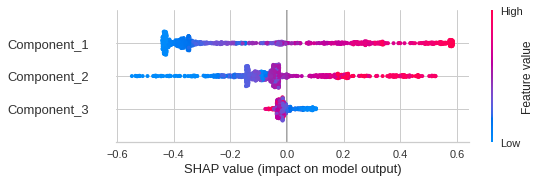

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [78]:
interpret_model(tuned_et_pca, plot='summary')


In [79]:
interpret_model(tuned_et_pca, plot='reason', observation=1)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=1, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [80]:
interpret_model(tuned_et_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
